In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#from model.resnet import ResNet18
from main import *
from utils import *
from resnet import*

Files already downloaded and verified
Files already downloaded and verified


In [2]:
#CUDA application 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
#model summary 
#dropout= 0.10
from resnet import ResNet18
from torchsummary import* 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [4]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss, 100.*correct/len(test_loader.dataset)

In [5]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups: 
        return param_group['lr']

  0%|          | 0/400 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.96E-02


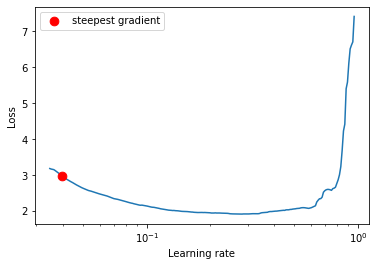

In [7]:
from  torch_lr_finder import LRFinder 

optimizer = optim.Adam(model.parameters(), lr=0.03, weight_decay= 1e-4)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model,optimizer,  criterion, device= "cuda" )
lr_finder.range_test (trainloader, end_lr = 10, num_iter =400, step_mode ="exp")
lr_finder.plot()
lr_finder.reset()

In [8]:
from torch.optim.lr_scheduler import OneCycleLR
#optimizer = optim.Adam(model.parameters(), lr=0.035, weight_decay= 1e-4)
#criterion = nn.CrossEntropyLoss()
epochs= 20
learning_rate = []
scheduler = OneCycleLR(
    optimizer, 
    max_lr= 3.90E-02,
    steps_per_epoch= len(trainloader),
    epochs = epochs,
    pct_start =5/epochs,
    div_factor =100, 
    three_phase =False, 
    final_div_factor =100,
    anneal_strategy= 'linear'
    )

In [9]:
train_loss_list = []
test_loss_list = []
train_accuracy_list=[]
test_accuracy_list=[]
learning_rate = []

for epoch in range(epochs):
    print(f"Epoch {epoch}")
    learning_rate.append (scheduler.get_lr())
    train_loss,train_acc = train(model, device, trainloader, optimizer, epoch, criterion,scheduler)
    #Sheduler.step()
    
    test_loss,test_acc = test(model,device,  testloader)

    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    train_accuracy_list.append(train_acc)
    test_accuracy_list.append(test_acc)
#learning_rate.append (scheduler.get_lr())

C:\Users\INHOPE\anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:1586: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "
  0%|                                                                                           | 0/98 [00:00<?, ?it/s]

Epoch 0


loss=1.4921098947525024 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:58<00:00,  1.67it/s]



Train set: Average loss: 0.0033, Accuracy: 18646/50000 (37.29%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -2.8107, Accuracy: 2780/10000 (27.80%)

Epoch 1


loss=1.256839394569397 batch_id=97: 100%|██████████████████████████████████████████████| 98/98 [00:57<00:00,  1.70it/s]



Train set: Average loss: 0.0028, Accuracy: 24140/50000 (48.28%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -3.0574, Accuracy: 3956/10000 (39.56%)

Epoch 2


loss=1.0174195766448975 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:58<00:00,  1.67it/s]



Train set: Average loss: 0.0024, Accuracy: 28025/50000 (56.05%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -2.2917, Accuracy: 4402/10000 (44.02%)

Epoch 3


loss=1.1041933298110962 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:59<00:00,  1.66it/s]



Train set: Average loss: 0.0022, Accuracy: 30217/50000 (60.43%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -1.9631, Accuracy: 3472/10000 (34.72%)

Epoch 4


loss=1.1806488037109375 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:58<00:00,  1.67it/s]



Train set: Average loss: 0.0022, Accuracy: 30518/50000 (61.04%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -2.4702, Accuracy: 3505/10000 (35.05%)

Epoch 5


loss=0.946561336517334 batch_id=97: 100%|██████████████████████████████████████████████| 98/98 [00:58<00:00,  1.69it/s]



Train set: Average loss: 0.0021, Accuracy: 31113/50000 (62.23%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -3.1374, Accuracy: 5116/10000 (51.16%)

Epoch 6


loss=1.0330544710159302 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:58<00:00,  1.67it/s]



Train set: Average loss: 0.0020, Accuracy: 32240/50000 (64.48%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -2.5872, Accuracy: 5064/10000 (50.64%)

Epoch 7


loss=1.1506798267364502 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:58<00:00,  1.67it/s]



Train set: Average loss: 0.0019, Accuracy: 32795/50000 (65.59%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -2.6926, Accuracy: 4754/10000 (47.54%)

Epoch 8


loss=0.7915913462638855 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:57<00:00,  1.69it/s]



Train set: Average loss: 0.0019, Accuracy: 33326/50000 (66.65%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -3.3152, Accuracy: 6256/10000 (62.56%)

Epoch 9


loss=0.7910418510437012 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:58<00:00,  1.69it/s]



Train set: Average loss: 0.0018, Accuracy: 34041/50000 (68.08%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -3.2524, Accuracy: 5873/10000 (58.73%)

Epoch 10


loss=0.8083638548851013 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:58<00:00,  1.68it/s]



Train set: Average loss: 0.0017, Accuracy: 34635/50000 (69.27%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -3.6060, Accuracy: 6081/10000 (60.81%)

Epoch 11


loss=0.7423621416091919 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:58<00:00,  1.69it/s]



Train set: Average loss: 0.0017, Accuracy: 35190/50000 (70.38%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -4.5140, Accuracy: 7264/10000 (72.64%)

Epoch 12


loss=0.8421616554260254 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:58<00:00,  1.68it/s]



Train set: Average loss: 0.0016, Accuracy: 35767/50000 (71.53%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -4.6921, Accuracy: 6886/10000 (68.86%)

Epoch 13


loss=0.7180912494659424 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:58<00:00,  1.68it/s]



Train set: Average loss: 0.0015, Accuracy: 36505/50000 (73.01%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -4.1437, Accuracy: 7134/10000 (71.34%)

Epoch 14


loss=0.701765775680542 batch_id=97: 100%|██████████████████████████████████████████████| 98/98 [00:58<00:00,  1.69it/s]



Train set: Average loss: 0.0015, Accuracy: 36905/50000 (73.81%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -5.6282, Accuracy: 7378/10000 (73.78%)

Epoch 15


loss=0.6289912462234497 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:57<00:00,  1.70it/s]



Train set: Average loss: 0.0014, Accuracy: 37615/50000 (75.23%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -5.1050, Accuracy: 7738/10000 (77.38%)

Epoch 16


loss=0.6157695055007935 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:58<00:00,  1.69it/s]



Train set: Average loss: 0.0013, Accuracy: 38555/50000 (77.11%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -5.8286, Accuracy: 7974/10000 (79.74%)

Epoch 17


loss=0.628288745880127 batch_id=97: 100%|██████████████████████████████████████████████| 98/98 [00:57<00:00,  1.69it/s]



Train set: Average loss: 0.0012, Accuracy: 39221/50000 (78.44%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -6.4597, Accuracy: 8144/10000 (81.44%)

Epoch 18


loss=0.5466952323913574 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:57<00:00,  1.70it/s]



Train set: Average loss: 0.0011, Accuracy: 40455/50000 (80.91%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -6.4851, Accuracy: 8459/10000 (84.59%)

Epoch 19


loss=0.48682326078414917 batch_id=97: 100%|████████████████████████████████████████████| 98/98 [00:58<00:00,  1.69it/s]



Train set: Average loss: 0.0010, Accuracy: 41604/50000 (83.21%)


Test set: Average loss: -7.4471, Accuracy: 8757/10000 (87.57%)



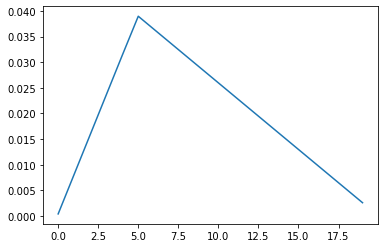

In [10]:
plt.plot (learning_rate)

Text(0.5, 1.0, 'Loss per epoch')

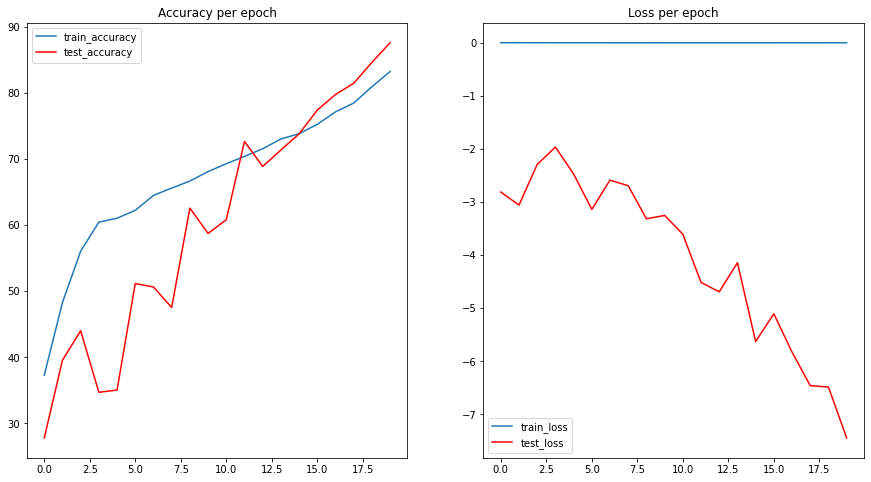

In [11]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [15, 8]
plt.subplot(1,2, 1)
plt.plot(np.array(train_accuracy_list))
plt.plot(np.array(test_accuracy_list), 'r')
plt.legend(["train_accuracy", "test_accuracy"])
plt.title("Accuracy per epoch")

plt.subplot(1,2,2)
plt.plot(train_loss_list)
plt.plot(test_loss_list, 'r')
plt.legend(["train_loss", "test_loss"])
plt.title("Loss per epoch")

In [12]:
from pylab import *
train_loader, test_loader = getCifar10DataLoader() 
#net = net.to(device)
model.eval()
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

#classes = testset.classes
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Files already downloaded and verified
Files already downloaded and verified
Accuracy of plane : 94 %
Accuracy of   car : 94 %
Accuracy of  bird : 75 %
Accuracy of   cat : 88 %
Accuracy of  deer : 87 %
Accuracy of   dog : 75 %
Accuracy of  frog : 92 %
Accuracy of horse : 86 %
Accuracy of  ship : 95 %
Accuracy of truck : 91 %


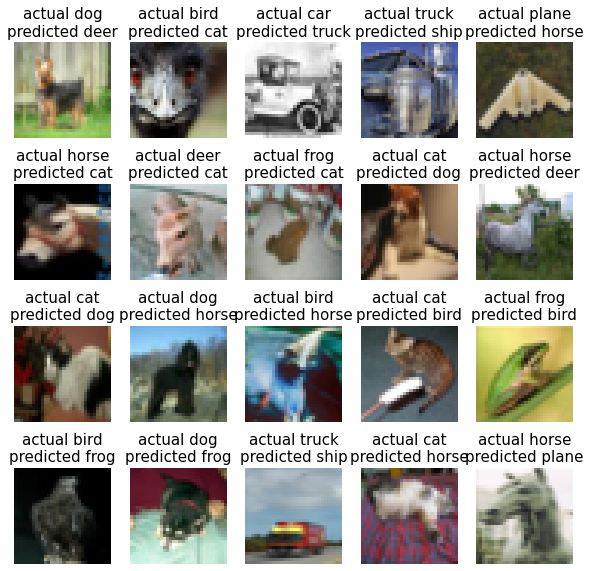

In [13]:
wp = getWrongPredictions(model, device, test_loader)
plotWrongPredictions(wp)

In [14]:
configs = [
    dict(model_type='resnet', arch=model, layer_name='layer1'),
    dict(model_type='resnet', arch=model, layer_name='layer2'),
    dict(model_type='resnet', arch=model, layer_name='layer3'),
    dict(model_type='resnet', arch=model, layer_name='layer4'),
]
    

In [35]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [18]:
#!pip install pytorch-gradcam

In [19]:
from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [30]:
from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

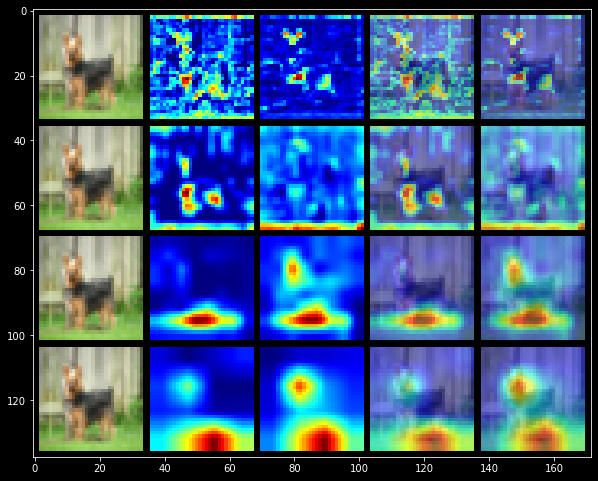

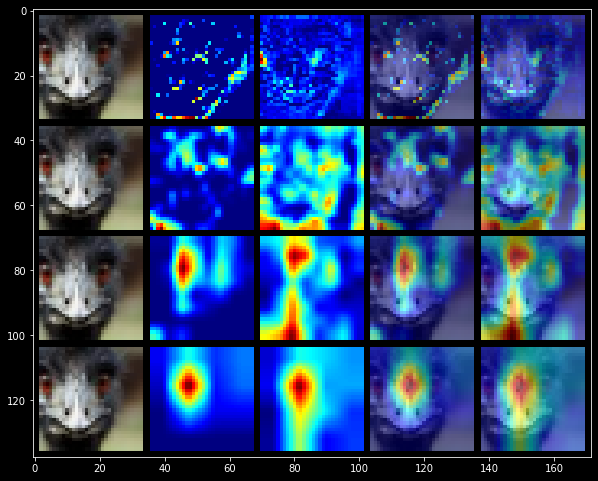

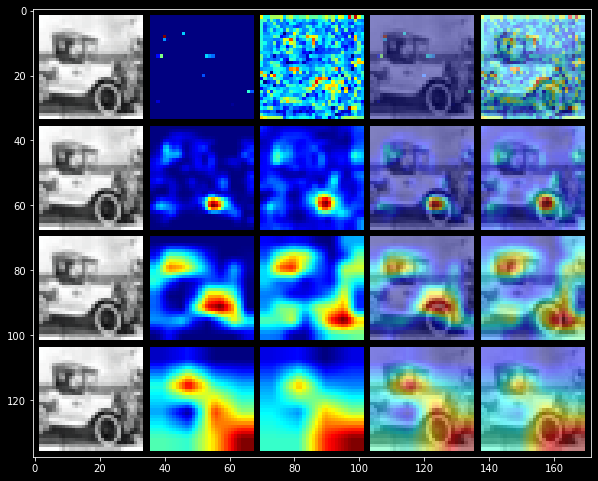

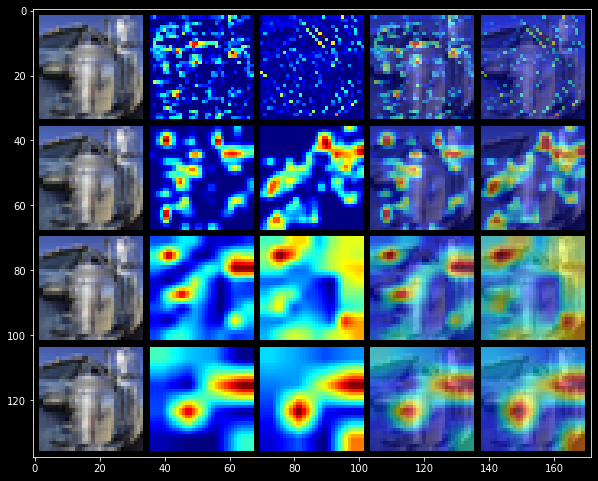

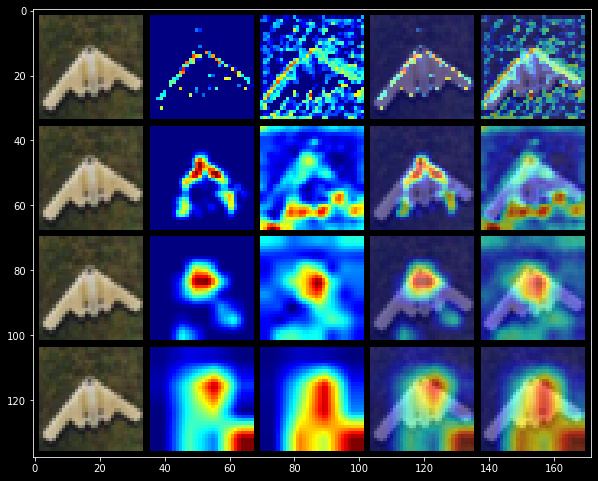

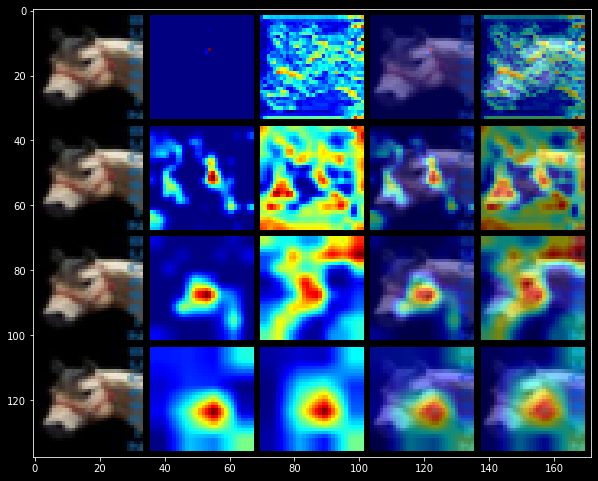

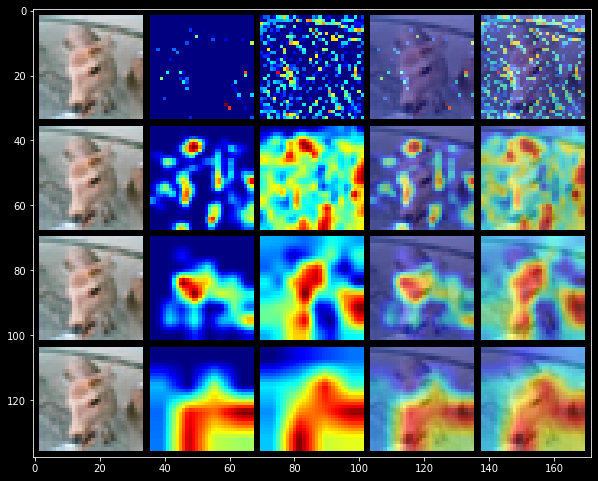

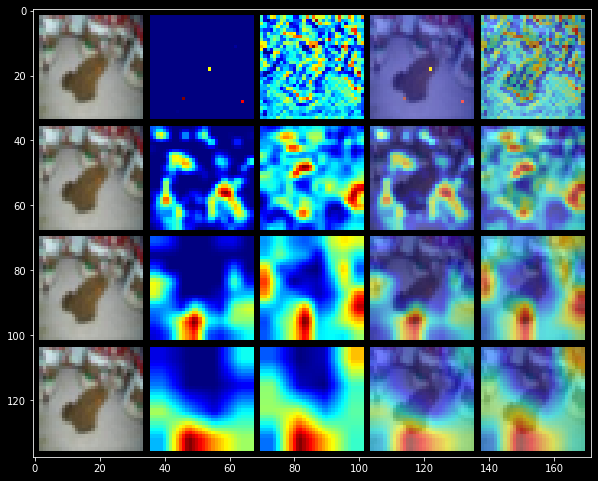

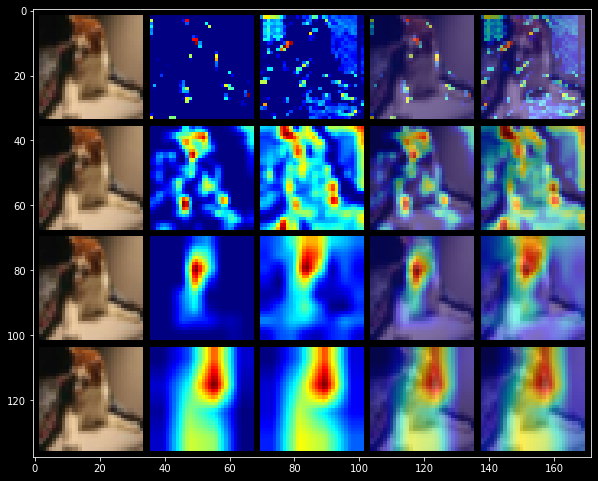

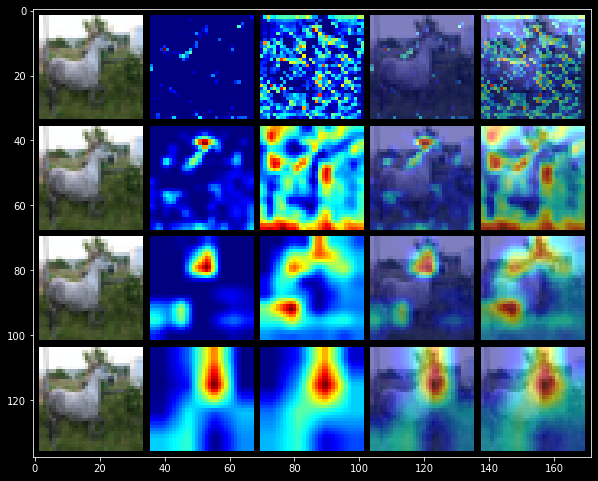

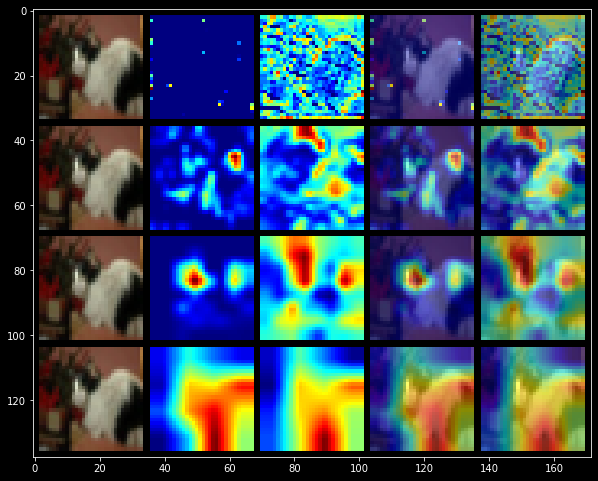

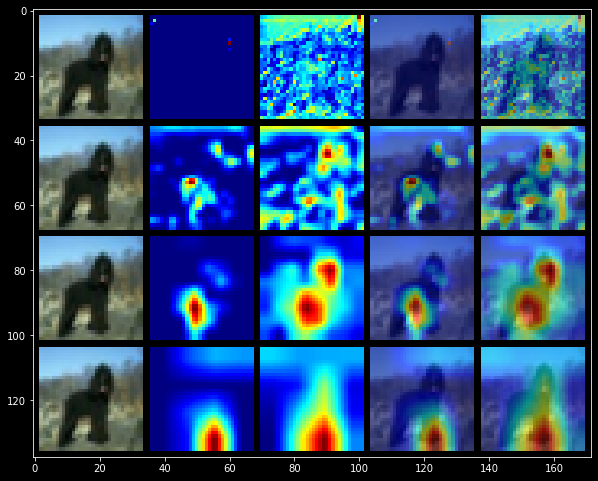

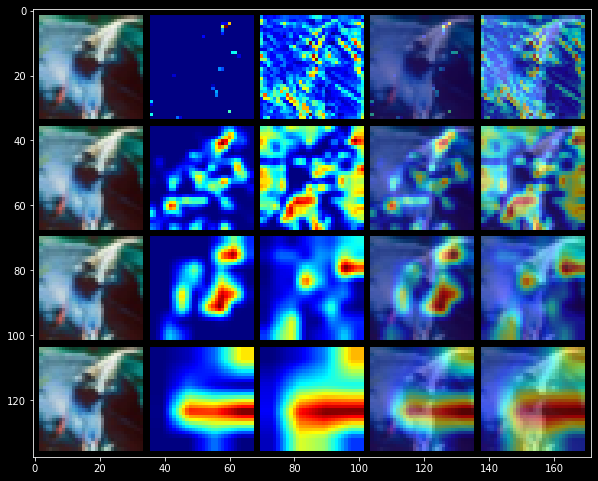

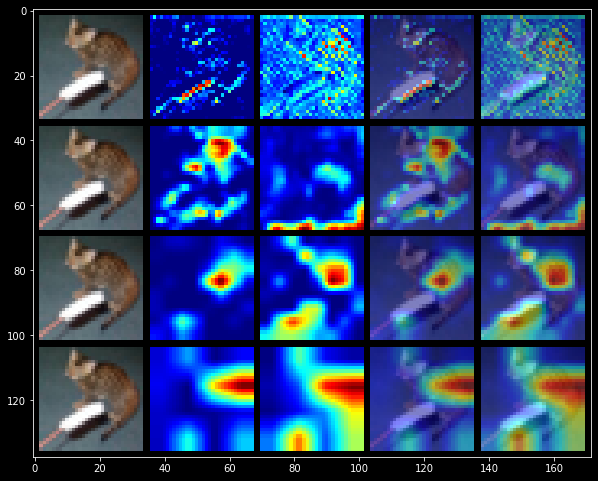

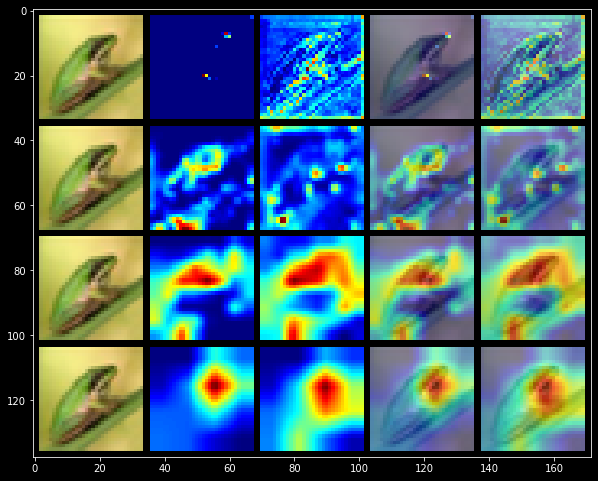

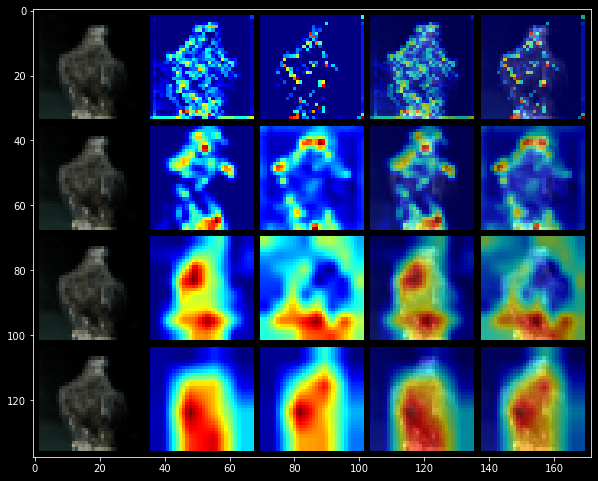

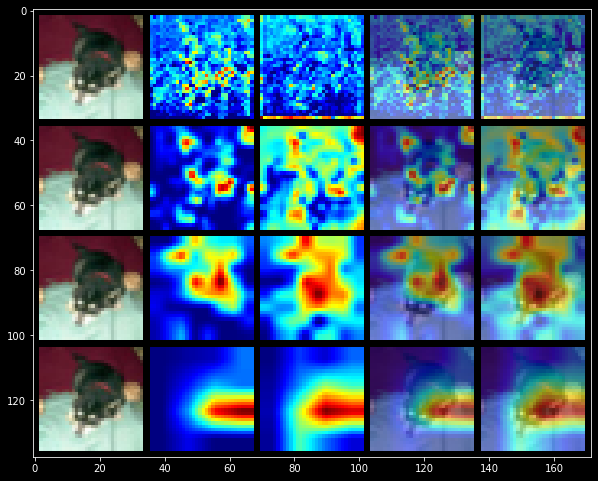

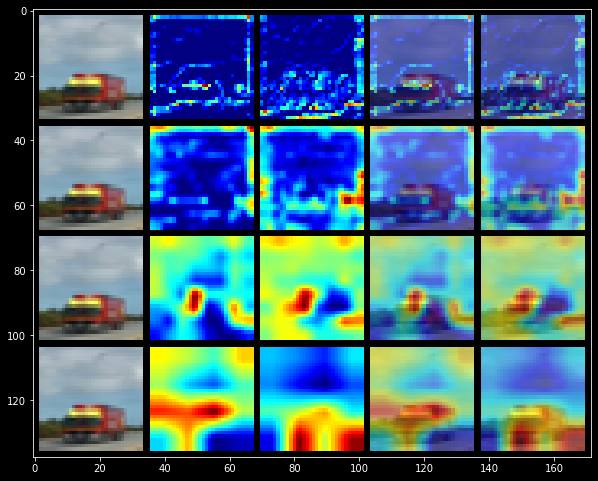

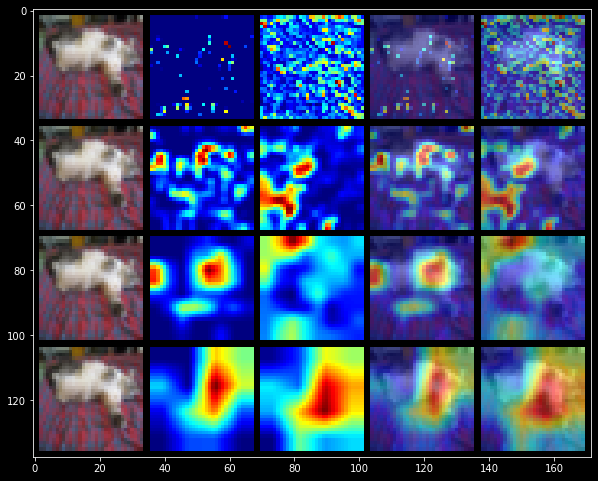

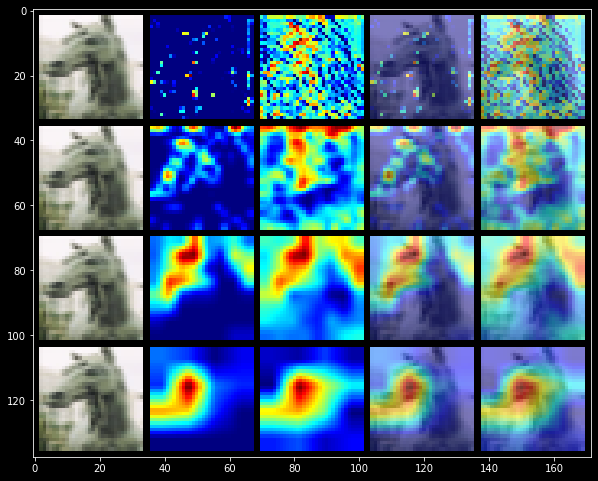

In [34]:
plotGradCam(wp[:20], cams)